In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


In [14]:
# Loading the data set from csv file
parse_datetime = lambda x: np.datetime64(datetime.fromisoformat(x).strftime('%Y-%m-%d %H:%M:%S'))
df = pd.read_csv('../Data/La Haute Borne Data/la-haute-borne-data-2017-2020.csv', sep=";", 
                converters={'Date_time':parse_datetime})


In [15]:
# this dataframe has the data collected from various sensors on many wind turbines
df

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08 08:00:00,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,...,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26 02:40:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26 13:50:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R80721,2017-01-26 15:00:00,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R80721,2017-02-18 01:10:00,44.990002,44.990002,44.990002,0.00,17.00,17.00,17.0,0.00,...,NaN,NaN,7.99000,NaN,NaN,NaN,7.99000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217583,R80721,2017-12-13 23:10:00,1.690000,-1.020000,13.300000,3.62,15.11,15.00,16.0,0.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217584,R80721,2017-12-14 03:30:00,6.350000,-1.010000,18.230000,5.51,16.15,16.00,17.0,0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217585,R80721,2017-12-14 04:20:00,-0.570000,-1.030000,4.320000,0.88,17.00,17.00,17.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217586,R80721,2017-12-14 05:10:00,-0.830000,-1.020000,3.890000,0.45,17.00,16.76,17.0,0.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Interested in data from only one wind turbine
df_wind = df[df['Wind_turbine_name']=='R80721']
# Interested in attributes related to wind speed only
df_wind = df_wind[[ 'Date_time', 'Ws_avg', 'Ws_min', 'Ws_max','Ws_std']]
df_wind

,Date_time,Ws_avg,Ws_min,Ws_max,Ws_std
0,2017-02-08 08:00:00,0.18,0.00,1.89,0.44
1,2017-01-26 02:40:00,4.85,3.67,6.01,0.39
2,2017-01-26 13:50:00,5.04,3.70,6.38,0.48
3,2017-01-26 15:00:00,5.31,3.76,6.93,0.54
4,2017-02-18 01:10:00,3.15,1.99,3.87,0.37
...,...,...,...,...,...
217583,2017-12-13 23:10:00,12.01,5.80,17.59,2.22
217584,2017-12-14 03:30:00,13.69,6.55,20.79,2.78
217585,2017-12-14 04:20:00,10.31,4.97,15.07,1.76
217586,2017-12-14 05:10:00,9.48,6.30,13.78,1.50


In [17]:
# set the indices to Date_time
df_wind.set_index('Date_time', inplace=True)
# sort the data according to Date_time
df_wind.sort_index(inplace=True)

In [18]:
# Now we have the dataframe of our interest which has attributes only related to wind speed. It is sorted according to datetime index
df_wind

,Ws_avg,Ws_min,Ws_max,Ws_std
Date_time,,,,
2017-01-01 00:00:00,3.23,2.64,4.07,0.23
2017-01-01 00:10:00,3.45,2.57,4.49,0.43
2017-01-01 00:20:00,3.53,2.28,4.34,0.52
2017-01-01 00:30:00,3.84,2.92,4.64,0.40
2017-01-01 00:40:00,3.93,3.41,4.42,0.18
...,...,...,...,...
2018-01-12 23:20:00,4.55,2.99,6.22,0.67
2018-01-12 23:30:00,2.85,0.00,4.26,0.92
2018-01-12 23:40:00,1.43,0.00,3.78,0.88


In [41]:
df_wind.iloc[:6]

,Ws_avg,Ws_min,Ws_max,Ws_std
Date_time,,,,
2017-01-01 00:00:00,3.23,2.64,4.07,0.23
2017-01-01 00:10:00,3.45,2.57,4.49,0.43
2017-01-01 00:20:00,3.53,2.28,4.34,0.52
2017-01-01 00:30:00,3.84,2.92,4.64,0.40
2017-01-01 00:40:00,3.93,3.41,4.42,0.18
2017-01-01 00:50:00,4.08,3.23,5.01,0.37


In [69]:
def plot_rolling_mean(series, freq=None, stepsize=1):
    if freq is None:  
        rolling_mean = series
    else:
        rolling_mean = series.rolling(freq).mean()[::stepsize]
    
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5), dpi =300)
    axes.plot(rolling_mean, label='rolling mean trend of wind speed')
    axes.set_xlabel('Time (10 min intervals)')
    axes.set_ylabel('Wind speed (m/s)')
    axes.set_title("Moving average of wind speed\n window size = {}".format(freq))
    axes.legend()
    fig.tight_layout()
    plt.grid()
    plt.show()

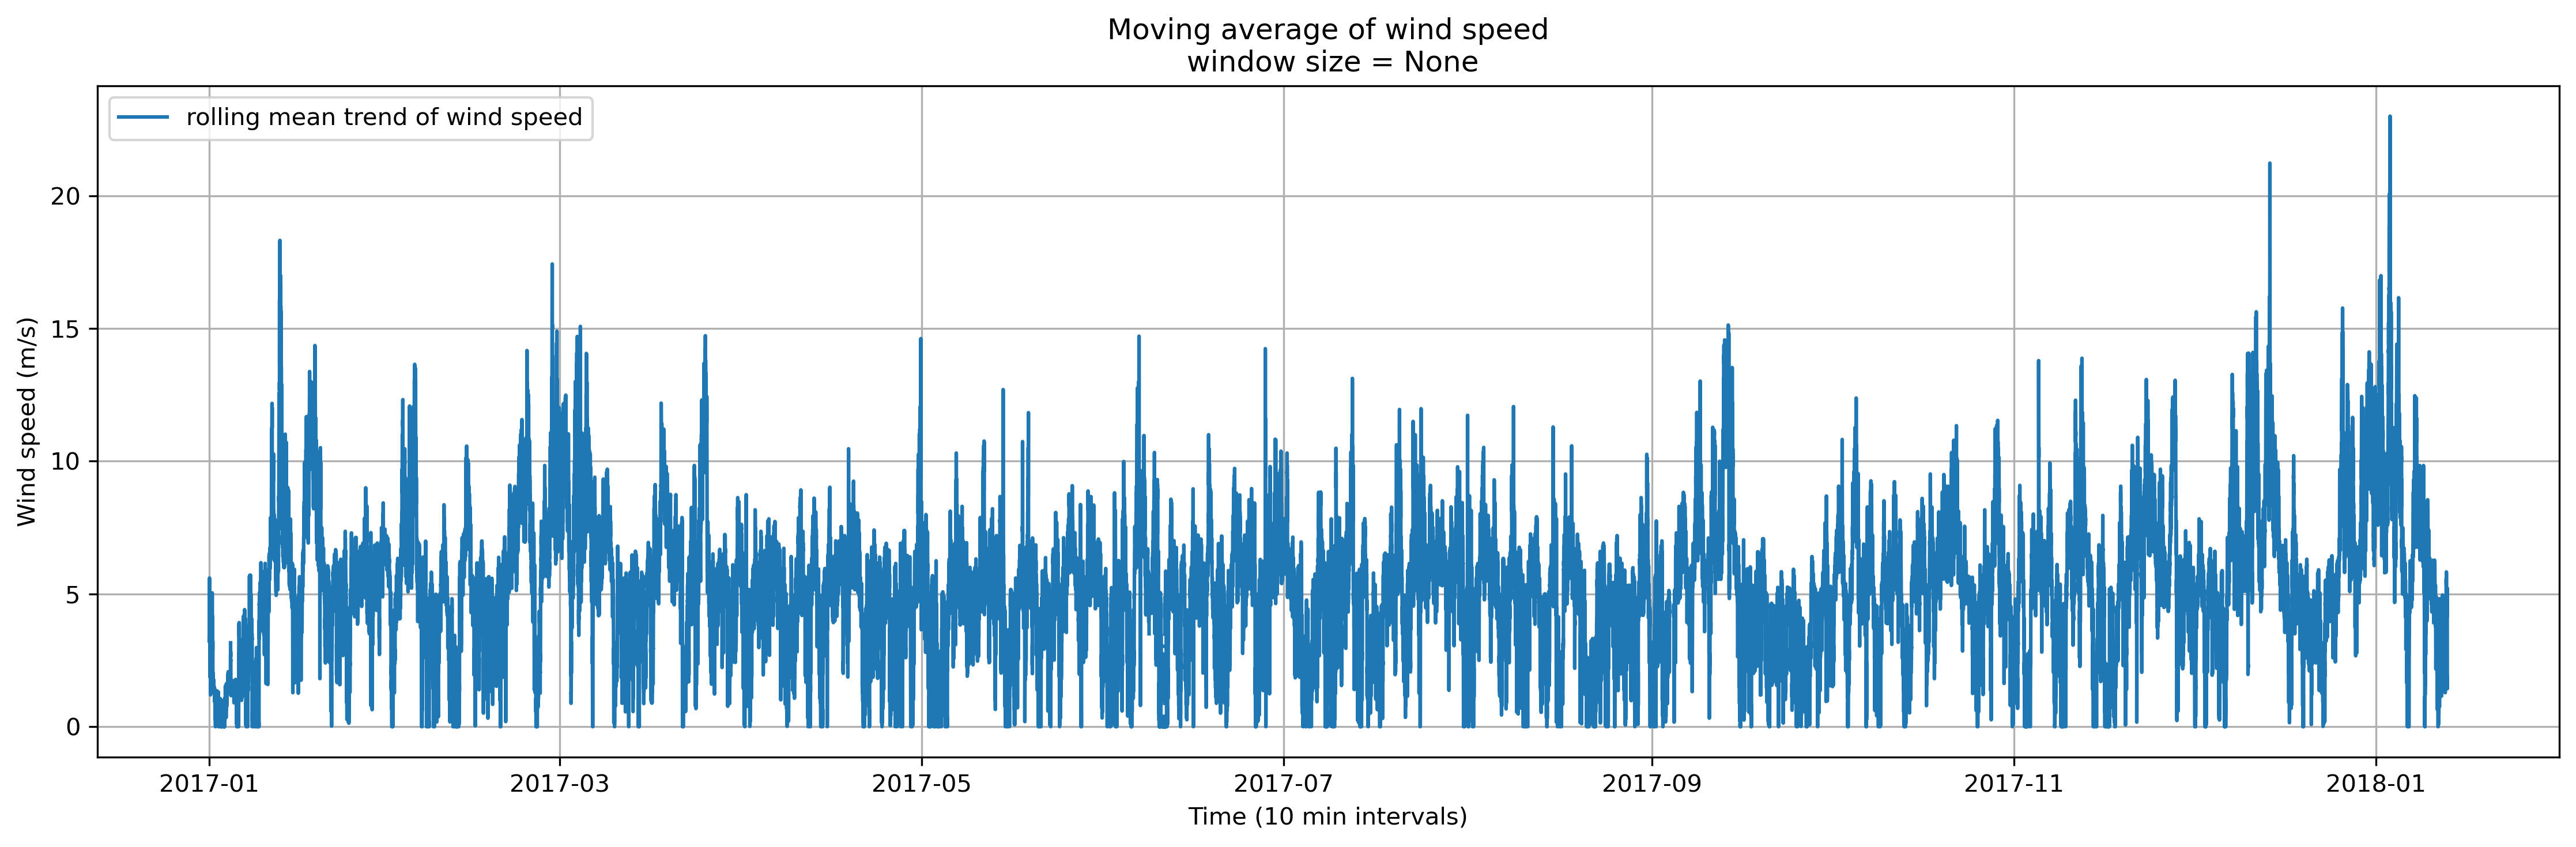

In [70]:
# Plot showing the wind speed trend with the whole available data
plot_rolling_mean(df_wind['Ws_avg'])

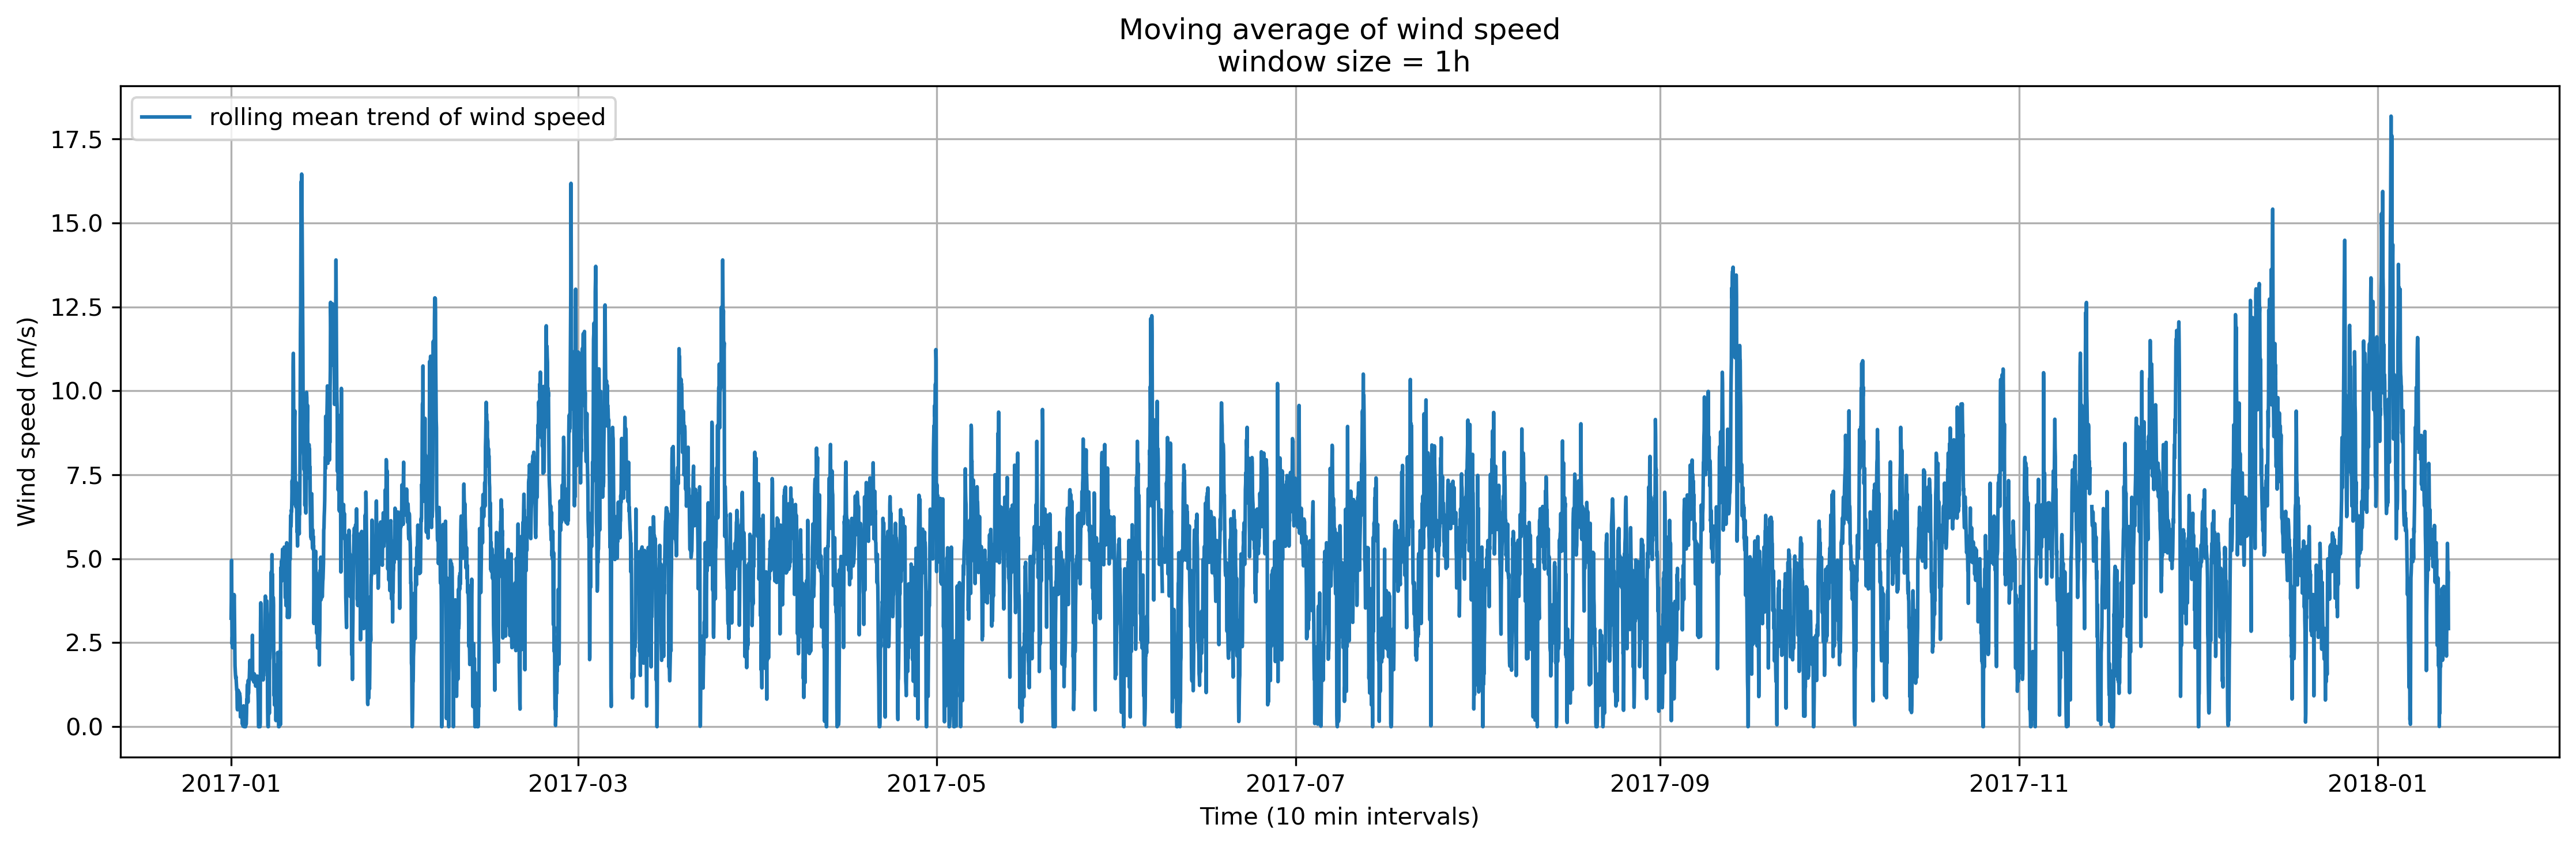

In [71]:
# Plot showing wind speed trend with rolling average window of 1 hour and step size of 6
plot_rolling_mean(df_wind['Ws_avg'], freq='1h', stepsize=6)

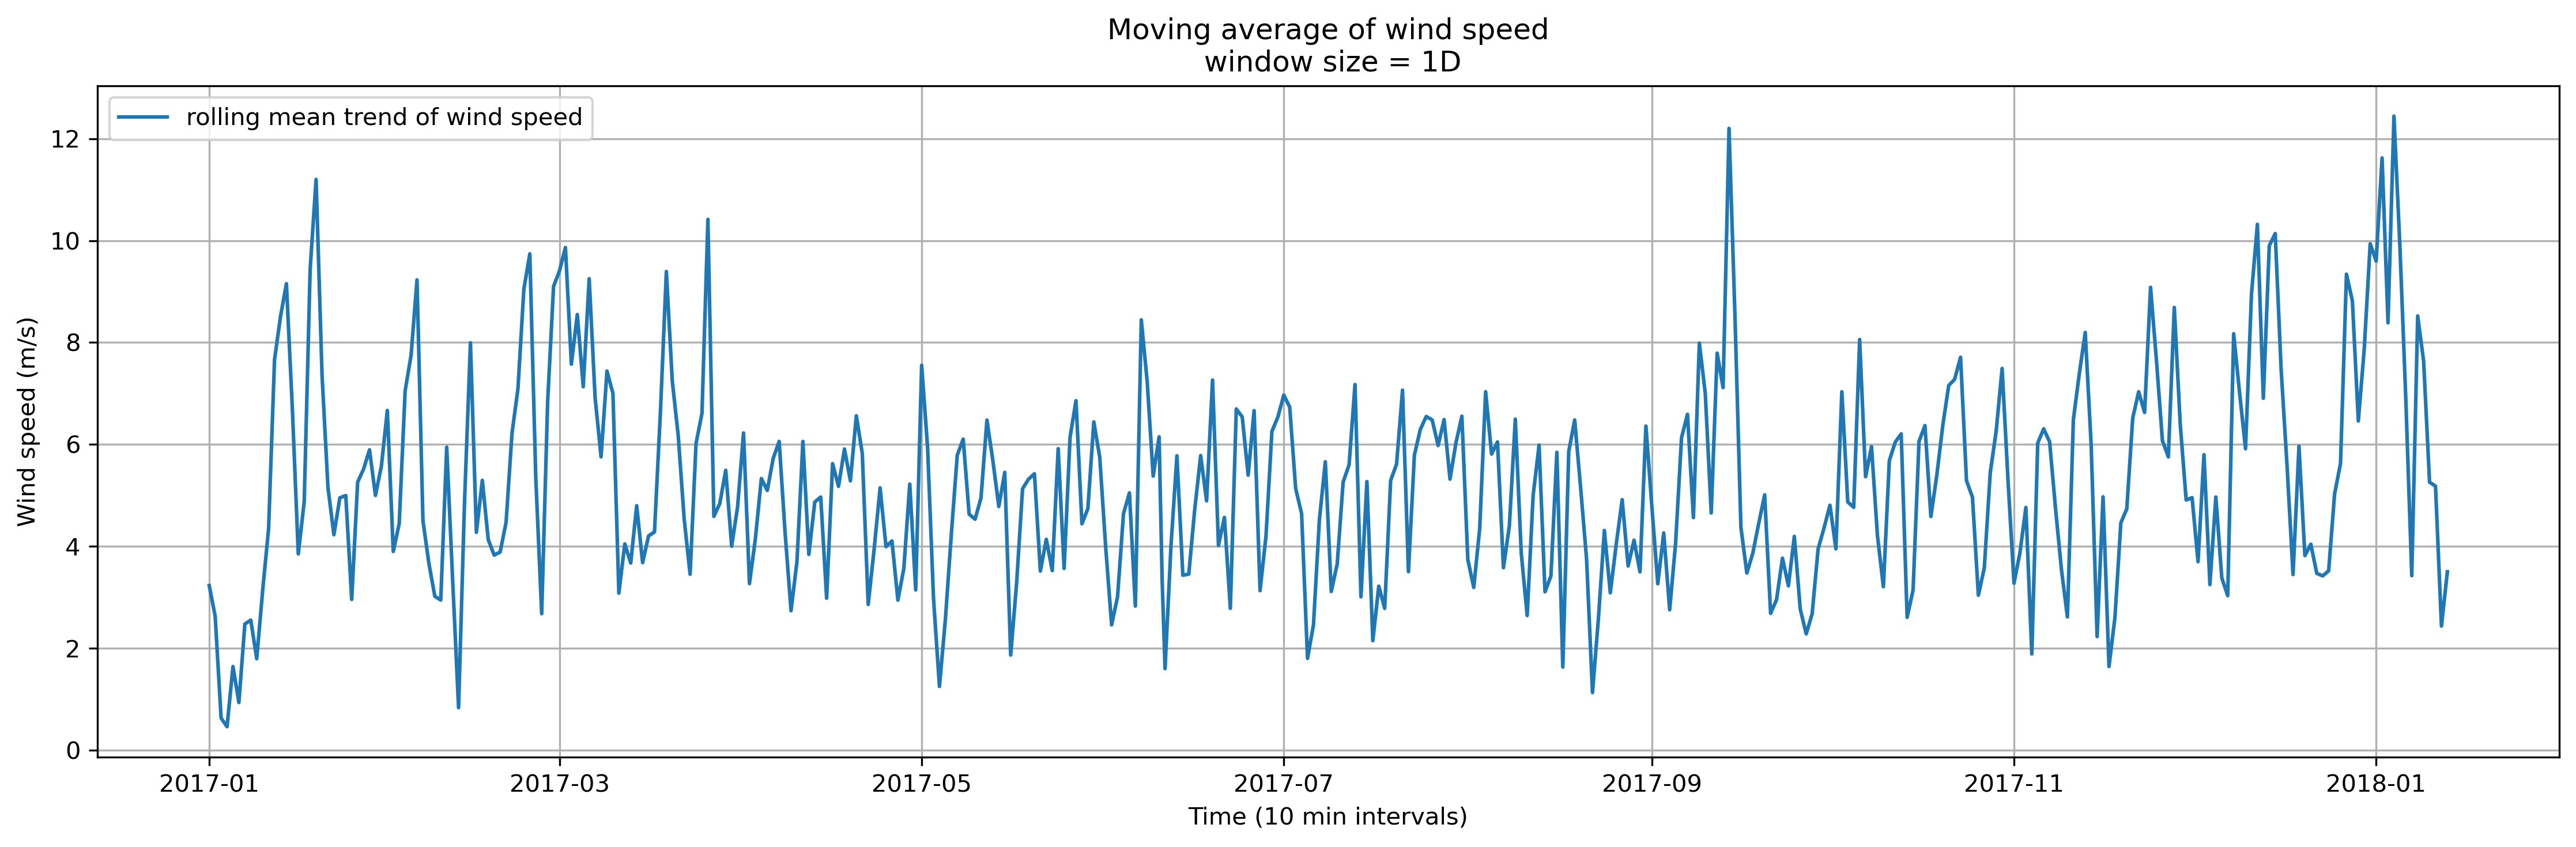

In [72]:
# Plot showing wind speed trend with rolling average window of 1 day and step size of 144
plot_rolling_mean(df_wind['Ws_avg'], freq='1D', stepsize=144)

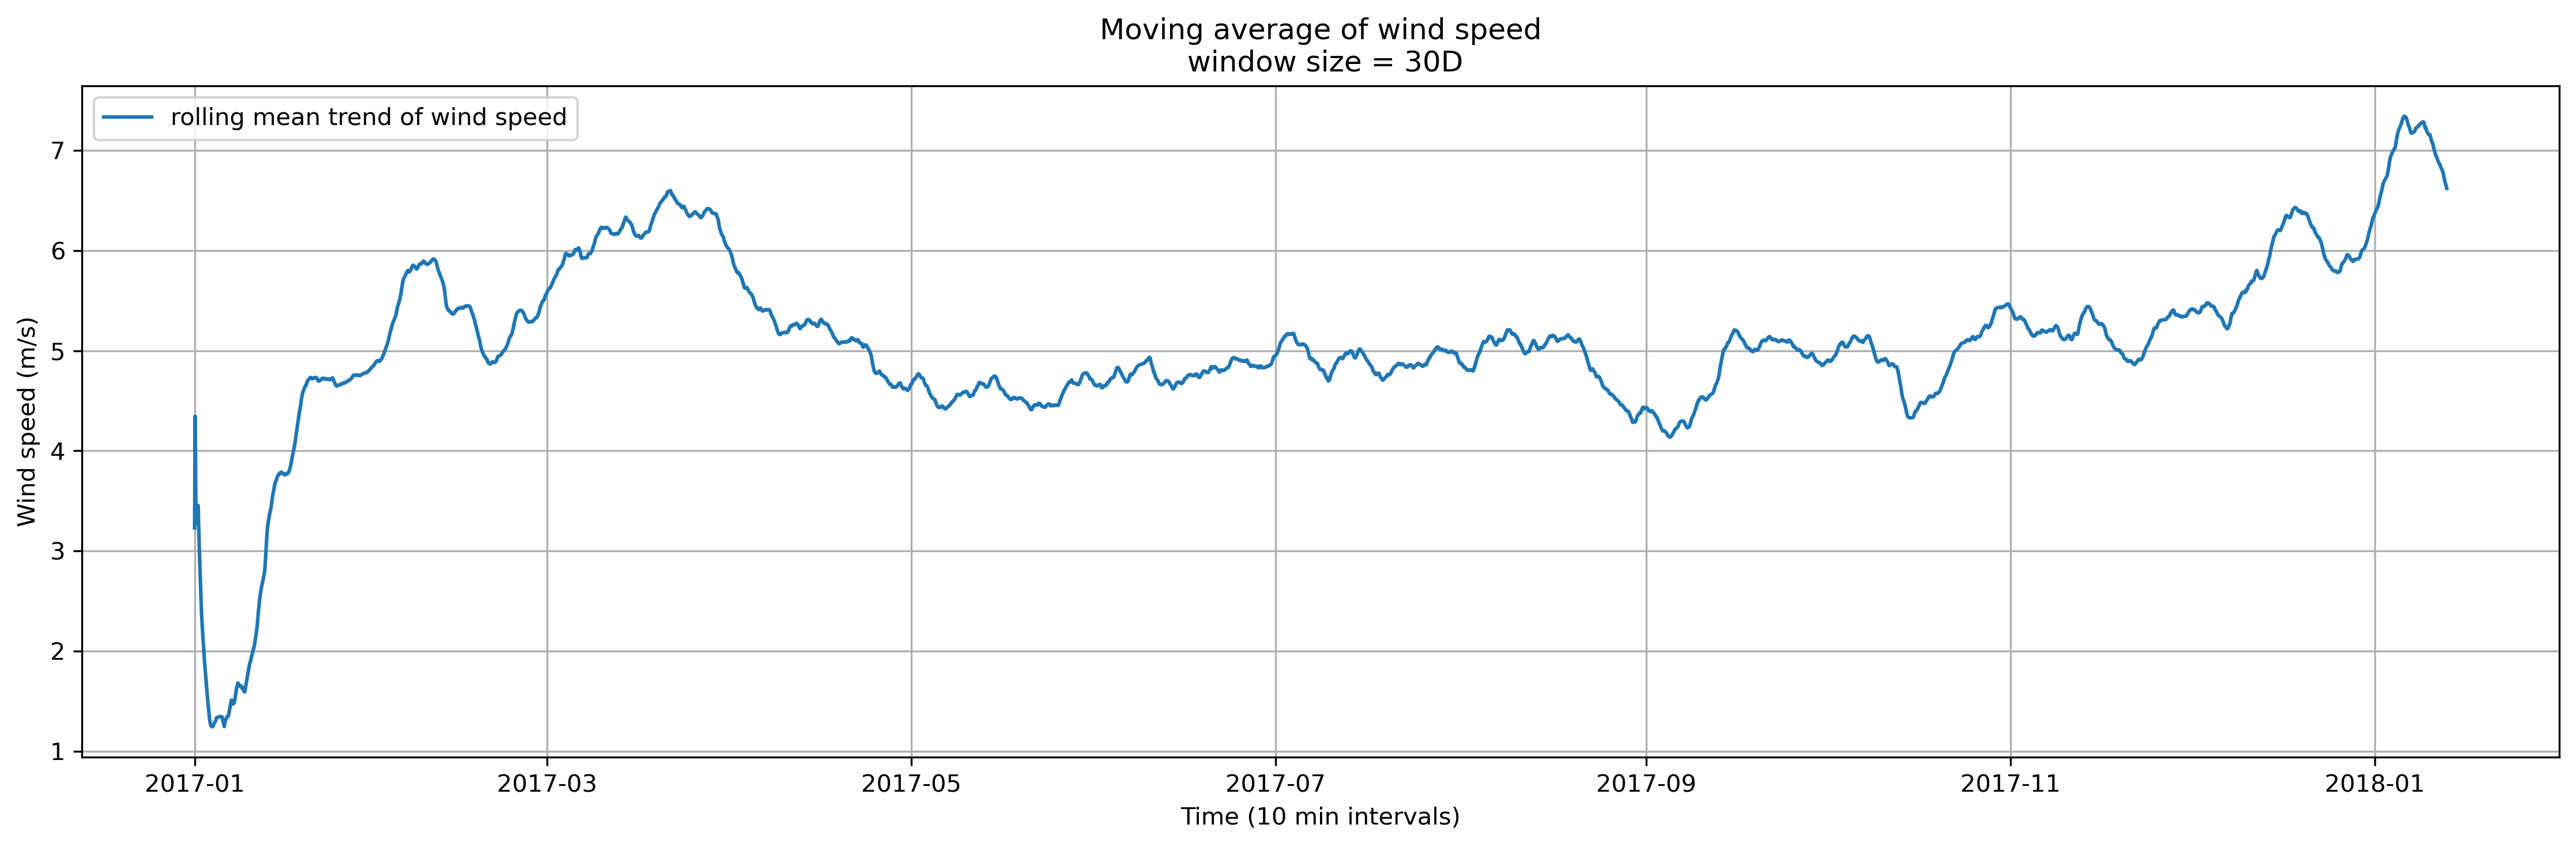

In [73]:
# Plot showing rolling mean of wind speed averaged over 30 days
plot_rolling_mean(df_wind['Ws_avg'], freq='30D')

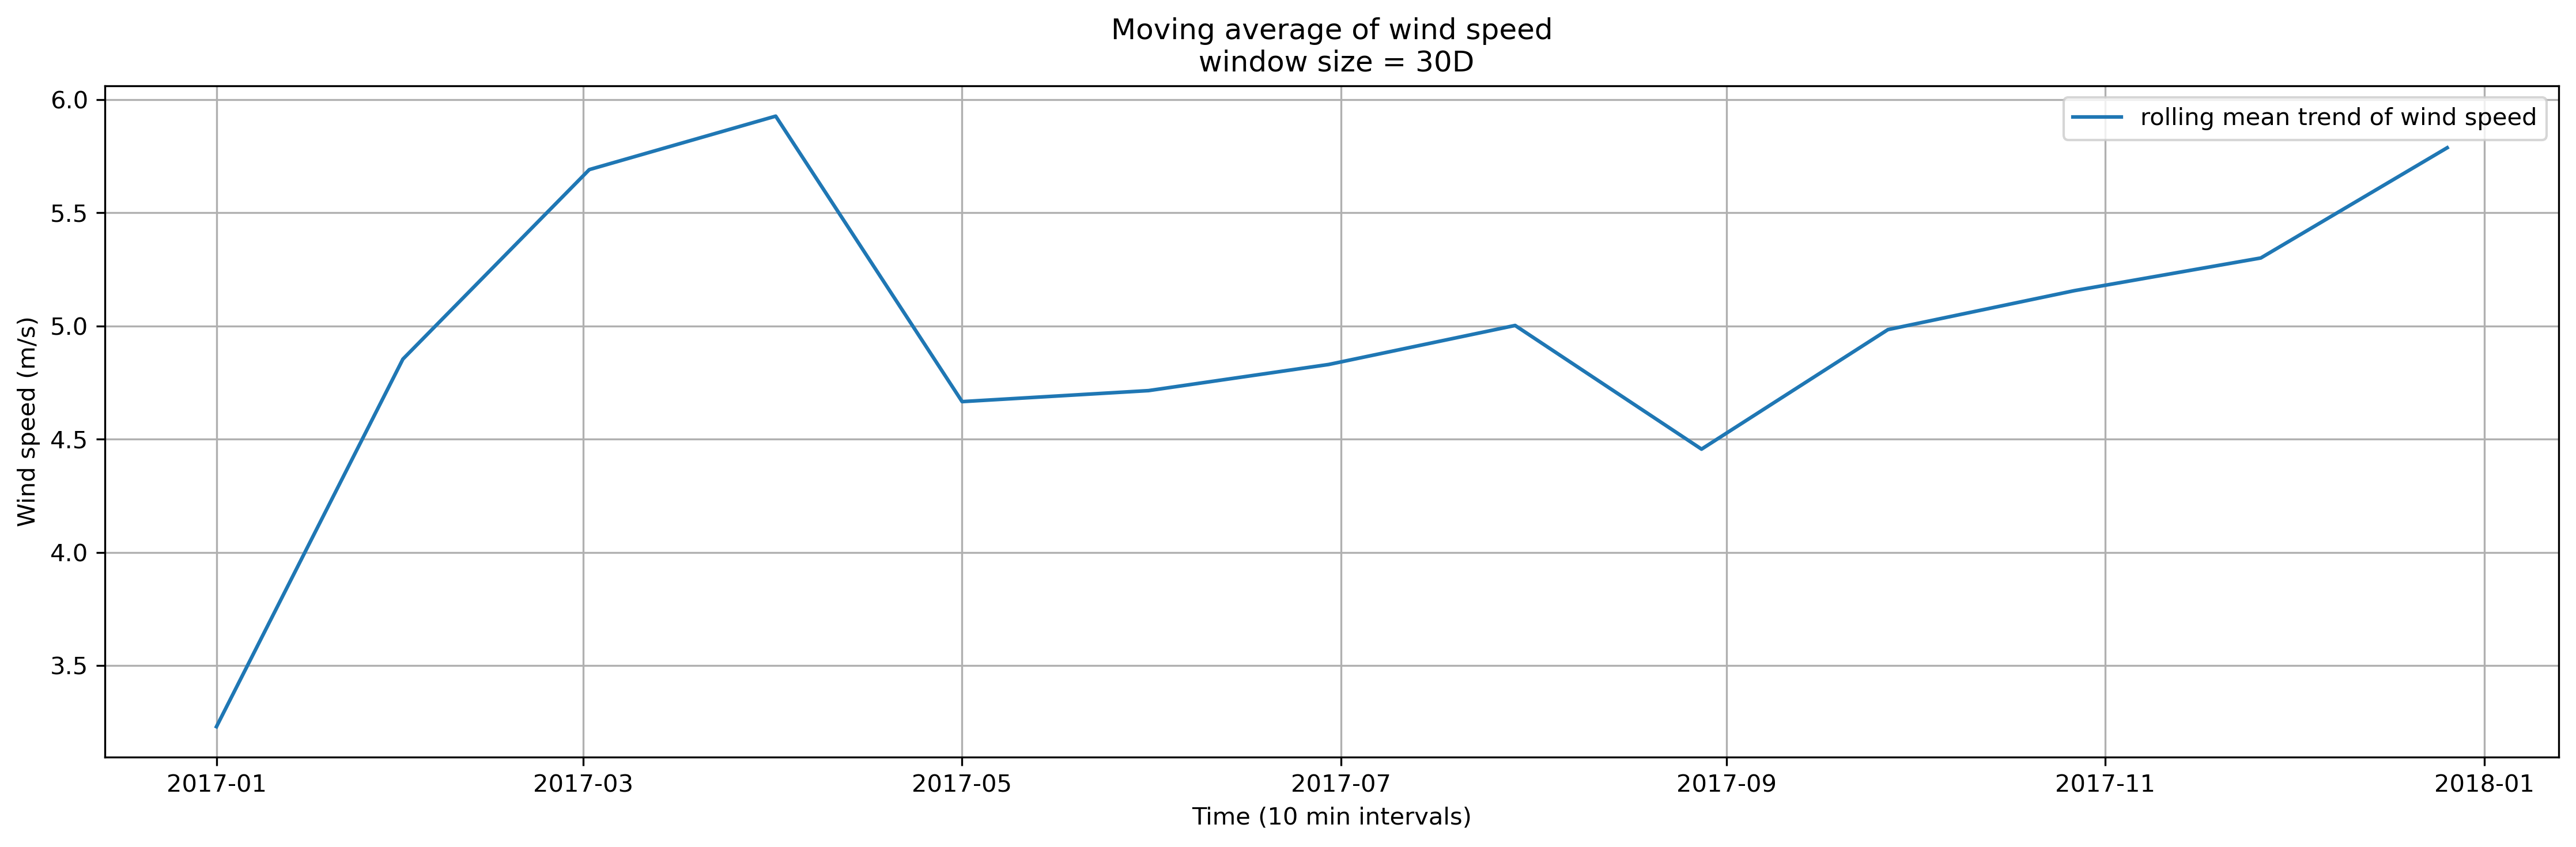

In [74]:
# Plot showing wind speed trend with 13 months data 
plot_rolling_mean(df_wind['Ws_avg'], freq='30D', stepsize=144*30)

In [68]:
len(df_wind['Ws_avg'].rolling('30D').mean()[::144*30])

13